First we define the problem on $[0,1]\times[0,2]$. 

In [1]:
f(x,y) = -sin(3*x.*y-4*y)*(9*y^2+(3*x-4)^2);
g(x,y) = sin(3*x*y-4*y);
xspan = [0,1];  yspan = [0,2];

Here is the finite difference solution.

In [2]:
include("../FNC.jl")
U,X,Y = FNC.poissonfd(f,g,50,xspan,80,yspan);

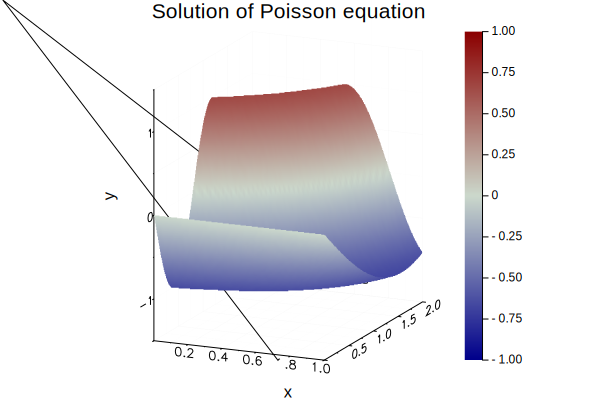

In [3]:
x = X[:,1];  y = Y[1,:];
using Plots
surface(x,y,U,match_dimensions=true,color=:bluesreds,
    title="Solution of Poisson equation",      
    xaxis=("x"), yaxis=("y"), zaxis=("u(x,y)"))    

In [4]:
?gui

search: gui distinguishable_colors gamutmin



```
gui([plot])
```

Display a plot using the backends' gui window


The error is a surprisingly smooth function.

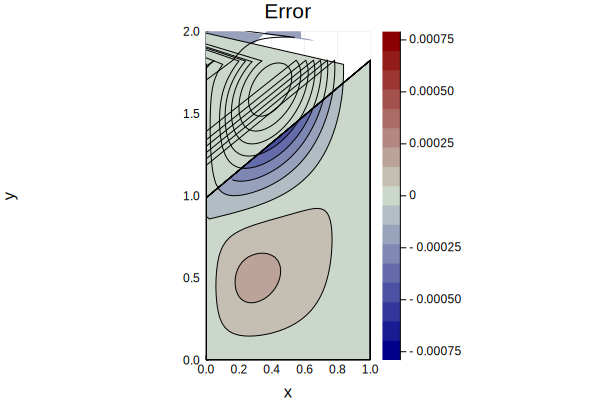

In [5]:
error = g.(X,Y) - U;
M = max( maximum(error),-minimum(error) )   
contourf(x,y,error,levels=17,match_dimensions=true,aspect_ratio=1,clims=(-M,M),color=:bluesreds,
    title="Error",xaxis=("x"),yaxis=("y") )

Because $u$ is specified on the boundary, we should observe that the error is zero on the boundary---else we have done something incorrectly.